Research Question: How does the genre of a movie or TV show impact its ratings and popularity votes on IMDB and TMDB? Are certain genres more likely to be successful, or do viewers have different preferences for different genres?


Notes: If a specific type of genre is more receptive it must accomplish 2 criteria:

A: Have a high overall score

B: Be popular (AKA having a high popularity rating)

What I will do: 
1. Graph both popularity and rating of the top 100 films in IMDB or TMDB catalogue see which type of genre has an overall higher score 
2. Take that genre (genre a) and compare it to another less popular genre (genre b) to see whether throughout the years the genre a has an overall higher rating than genre b
3. If Genre A has an clear over higher rating than Genre B, there would suggest that certain genres are more popular
4. If Genre A isn't clearly higher than Genre B it would suggest that a film's genre doesn't impact the rating


# TMDB

In [12]:
import pandas
df = pandas.read_csv('titles.csv')

Looking at top 100 films and how many of those top 100 films had that specific genre

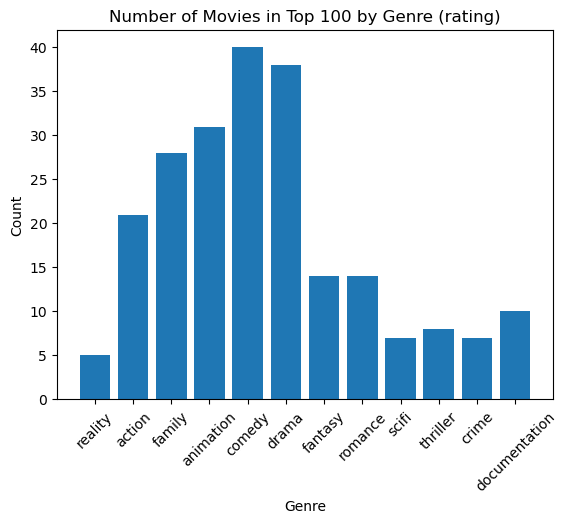

In [13]:
top_100_scores = df.sort_values('tmdb_score', ascending=False).head(100)
import matplotlib.pyplot as plt

# Define a list of genre names
genres = ['reality', 'action', 'family', 'animation', 'comedy', 'drama', 'fantasy', 'romance', 'scifi', 'thriller', 'crime', 'documentation']

# Count the number of movies in the top 100 for each genre
counts = []
for genre in genres:
    count = top_100_scores['genres'].str.contains(genre).sum()
    counts.append(count)

# Create a stacked bar chart showing the number of movies in the top 10 for each genre
plt.bar(range(len(genres)), counts)
plt.xticks(range(len(genres)), genres, rotation=45) # Rotate x-axis labels by 45 degrees
plt.title('Number of Movies in Top 100 by Genre (rating)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()



Doing the same with popularity

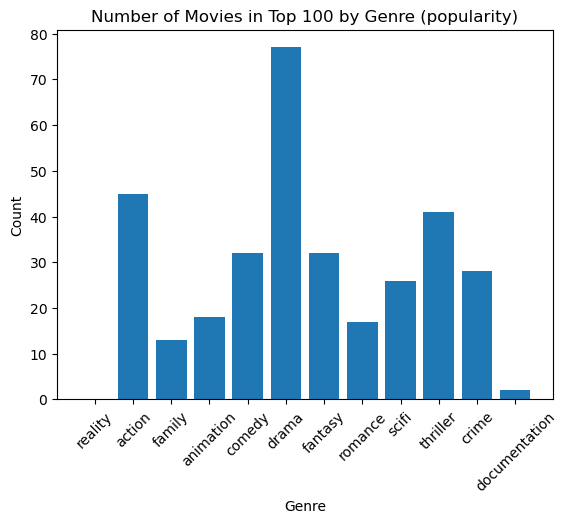

In [14]:
top_100_popularity = df.sort_values('tmdb_popularity', ascending=False).head(100)



import matplotlib.pyplot as plt

# Define a list of genre names
genres = ['reality', 'action', 'family', 'animation', 'comedy', 'drama', 'fantasy', 'romance', 'scifi', 'thriller', 'crime', 'documentation']

# Count the number of movies in the top 100 for each genre
counts = []
for genre in genres:
    count = top_100_popularity['genres'].str.contains(genre).sum()
    counts.append(count)

# Create a stacked bar chart showing the number of movies in the top 100 for each genre
plt.bar(range(len(genres)), counts)
plt.xticks(range(len(genres)), genres, rotation=45) # Rotate x-axis labels by 45 degrees
plt.title('Number of Movies in Top 100 by Genre (popularity)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


It's clear that the Genres: Drama, Comedy, and Action all score higher than average in both popularity and score
As for the bottom 3 it would be: Reality, documentation, and scifi, being the overall lowest rating and popularity. We will now graph these 6 genres

Top 3

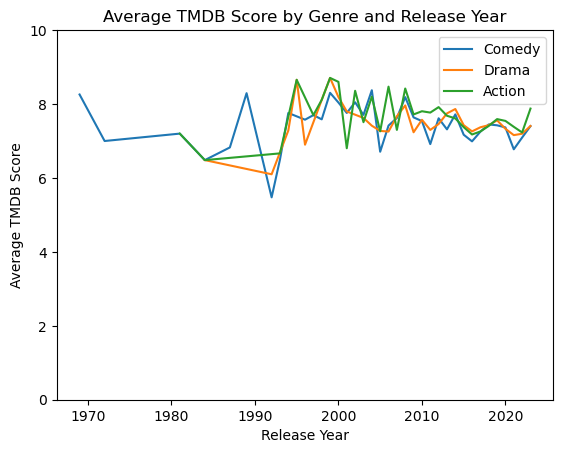

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data from the CSV file
df = pd.read_csv('titles.csv')

# remove all rows with missing values
df_cleaned = df.dropna()

# filter the DataFrame to only include movies with the genres 'comedy' and 'reality'
comedy_movies = df_cleaned[df_cleaned['genres'].str.contains('comedy')]
drama_movies = df_cleaned[df_cleaned['genres'].str.contains('drama')]
action_movies = df_cleaned[df_cleaned['genres'].str.contains('action')]

# group the movies by release year and calculate the mean score for each year and genre
comedy_scores_by_year = comedy_movies.groupby('release_year')['tmdb_score'].mean()
drama_scores_by_year = drama_movies.groupby('release_year')['tmdb_score'].mean()
action_scores_by_year = action_movies.groupby('release_year')['tmdb_score'].mean()

# sort the data by release year
comedy_scores_by_year = comedy_scores_by_year.sort_index()
drama_scores_by_year = drama_scores_by_year.sort_index()
action_scores_by_year = action_scores_by_year.sort_index()

# plot the data for comedy movies as a line graph
plt.plot(comedy_scores_by_year.index, comedy_scores_by_year.values, label='Comedy')


plt.plot(drama_scores_by_year.index, drama_scores_by_year.values, label='Drama')

plt.plot(action_scores_by_year.index, action_scores_by_year.values, label='Action')

# set the x-axis label, y-axis label, title, and legend
plt.xlabel('Release Year')
plt.ylabel('Average TMDB Score')
plt.title('Average TMDB Score by Genre and Release Year')
plt.legend()

# set the y-axis limits to 0-10
plt.ylim(0, 10)

# display the plot
plt.show()


It's a bit difficult to see but it looks like action seems to have a generally higher rating overall

Bottom 3

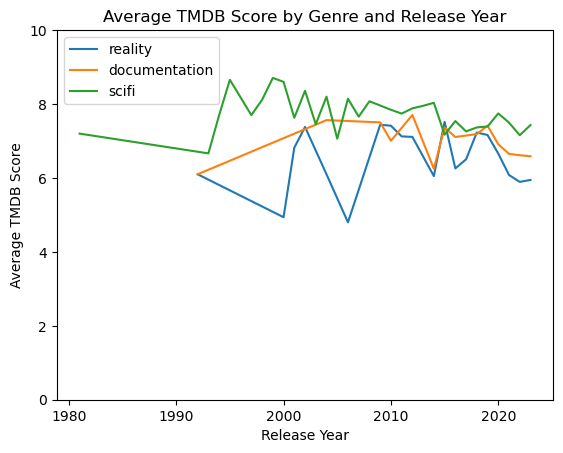

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data from the CSV file
df = pd.read_csv('titles.csv')

# remove all rows with missing values
df_cleaned = df.dropna()

# filter the DataFrame to only include movies with the genres 'comedy' and 'reality'
reality_movies = df_cleaned[df_cleaned['genres'].str.contains('reality')]
documentation_movies = df_cleaned[df_cleaned['genres'].str.contains('documentation')]
scifi_movies = df_cleaned[df_cleaned['genres'].str.contains('scifi')]

# group the movies by release year and calculate the mean score for each year and genre
reality_scores_by_year = reality_movies.groupby('release_year')['tmdb_score'].mean()
documentation_scores_by_year = documentation_movies.groupby('release_year')['tmdb_score'].mean()
scifi_scores_by_year = scifi_movies.groupby('release_year')['tmdb_score'].mean()

# sort the data by release year
reality_scores_by_year = reality_scores_by_year.sort_index()
documentation_scores_by_year = documentation_scores_by_year.sort_index()
scifi_scores_by_year = scifi_scores_by_year.sort_index()

# plot the data for comedy movies as a line graph
plt.plot(reality_scores_by_year.index, reality_scores_by_year.values, label='reality')


plt.plot(documentation_scores_by_year.index, documentation_scores_by_year.values, label='documentation')

plt.plot(scifi_scores_by_year.index, scifi_scores_by_year.values, label='scifi')

# set the x-axis label, y-axis label, title, and legend
plt.xlabel('Release Year')
plt.ylabel('Average TMDB Score')
plt.title('Average TMDB Score by Genre and Release Year')
plt.legend()

# set the y-axis limits to 0-10
plt.ylim(0, 10)

# display the plot
plt.show()


Combining it together

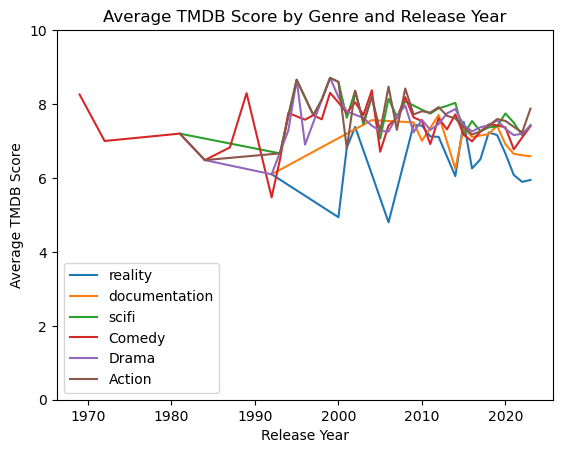

In [17]:
# plot the data for comedy movies as a line graph
plt.plot(reality_scores_by_year.index, reality_scores_by_year.values, label='reality')


plt.plot(documentation_scores_by_year.index, documentation_scores_by_year.values, label='documentation')

plt.plot(scifi_scores_by_year.index, scifi_scores_by_year.values, label='scifi')


plt.plot(comedy_scores_by_year.index, comedy_scores_by_year.values, label='Comedy')

plt.plot(drama_scores_by_year.index, drama_scores_by_year.values, label='Drama')

plt.plot(action_scores_by_year.index, action_scores_by_year.values, label='Action')

# set the x-axis label, y-axis label, title, and legend
plt.xlabel('Release Year')
plt.ylabel('Average TMDB Score')
plt.title('Average TMDB Score by Genre and Release Year')
plt.legend()

# set the y-axis limits to 0-10
plt.ylim(0, 10)

# display the plot
plt.show()


It seems that besides scifi, documentation and reality films seem to do very bad on average. 
Let's compare Scifi to Action

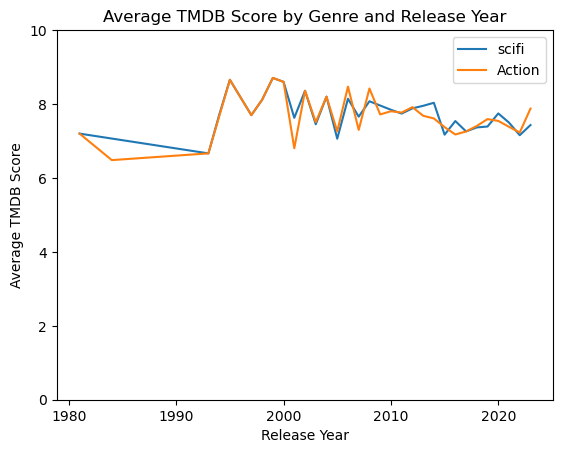

In [18]:
# plot the data for comedy movies as a line graph


plt.plot(scifi_scores_by_year.index, scifi_scores_by_year.values, label='scifi')



plt.plot(action_scores_by_year.index, action_scores_by_year.values, label='Action')

# set the x-axis label, y-axis label, title, and legend
plt.xlabel('Release Year')
plt.ylabel('Average TMDB Score')
plt.title('Average TMDB Score by Genre and Release Year')
plt.legend()

# set the y-axis limits to 0-10
plt.ylim(0, 10)

# display the plot
plt.show()


# Conclusion 

Besides Sci Fi, (which may or may not be an outlier) on average movie genres that are either reality or documentation tend to do worse than movies that are in other genres.

Takeaway:
Film/Studio producers should focus less on making documentation and reality films if they want a higher TMBD rating

# IMDB

Again, top 100 scores but for IMDB now

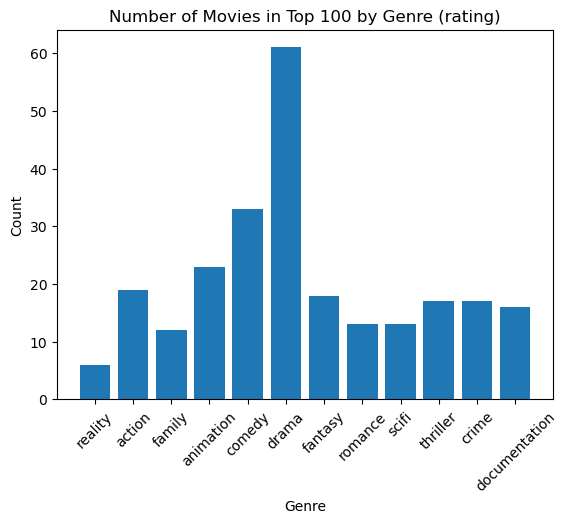

In [19]:
top_100_scores = df.sort_values('imdb_score', ascending=False).head(100)
import matplotlib.pyplot as plt

# Define a list of genre names
genres = ['reality', 'action', 'family', 'animation', 'comedy', 'drama', 'fantasy', 'romance', 'scifi', 'thriller', 'crime', 'documentation']

# Count the number of movies in the top 100 for each genre
counts = []
for genre in genres:
    count = top_100_scores['genres'].str.contains(genre).sum()
    counts.append(count)

# Create a stacked bar chart showing the number of movies in the top 10 for each genre
plt.bar(range(len(genres)), counts)
plt.xticks(range(len(genres)), genres, rotation=45) # Rotate x-axis labels by 45 degrees
plt.title('Number of Movies in Top 100 by Genre (rating)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()



Now we look at popularity

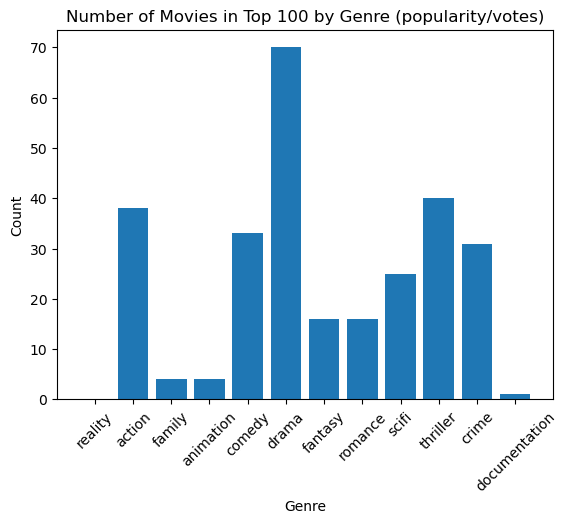

In [20]:
top_100_popularity = df.sort_values('imdb_votes', ascending=False).head(100)



import matplotlib.pyplot as plt

# Define a list of genre names
genres = ['reality', 'action', 'family', 'animation', 'comedy', 'drama', 'fantasy', 'romance', 'scifi', 'thriller', 'crime', 'documentation']

# Count the number of movies in the top 100 for each genre
counts = []
for genre in genres:
    count = top_100_popularity['genres'].str.contains(genre).sum()
    counts.append(count)

# Create a stacked bar chart showing the number of movies in the top 100 for each genre
plt.bar(range(len(genres)), counts)
plt.xticks(range(len(genres)), genres, rotation=45) # Rotate x-axis labels by 45 degrees
plt.title('Number of Movies in Top 100 by Genre (popularity/votes)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


For IMDB it's clear that Drama scores both high in popularity and also rating. Second and third place would also be comedy and action. This is exactly the same as TMBD except for the fact that Drama is by far the most popular. It could be the top 100 films in TMDB and IMDB are similar which can cause this similarity

Graphing top genres: Drama, Comedy, and Action

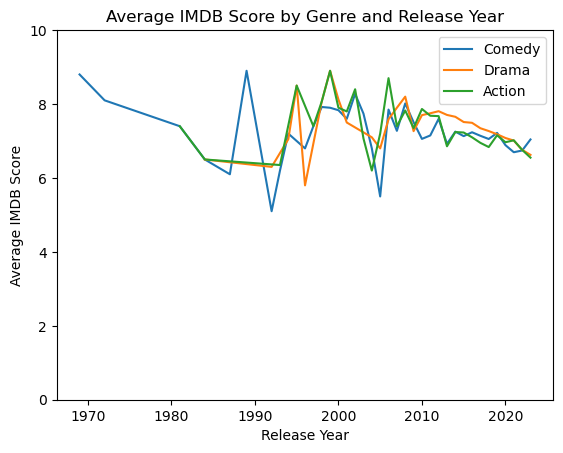

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data from the CSV file
df = pd.read_csv('titles.csv')

# remove all rows with missing values
df_cleaned = df.dropna()

# filter the DataFrame to only include movies with the genres 'comedy' and 'reality'
comedy_movies = df_cleaned[df_cleaned['genres'].str.contains('comedy')]
drama_movies = df_cleaned[df_cleaned['genres'].str.contains('drama')]
action_movies = df_cleaned[df_cleaned['genres'].str.contains('action')]

# group the movies by release year and calculate the mean score for each year and genre
comedy_scores_by_year = comedy_movies.groupby('release_year')['imdb_score'].mean()
drama_scores_by_year = drama_movies.groupby('release_year')['imdb_score'].mean()
action_scores_by_year = action_movies.groupby('release_year')['imdb_score'].mean()

# sort the data by release year
comedy_scores_by_year = comedy_scores_by_year.sort_index()
drama_scores_by_year = drama_scores_by_year.sort_index()
action_scores_by_year = action_scores_by_year.sort_index()

# plot the data for comedy movies as a line graph
plt.plot(comedy_scores_by_year.index, comedy_scores_by_year.values, label='Comedy')


plt.plot(drama_scores_by_year.index, drama_scores_by_year.values, label='Drama')

plt.plot(action_scores_by_year.index, action_scores_by_year.values, label='Action')

# set the x-axis label, y-axis label, title, and legend
plt.xlabel('Release Year')
plt.ylabel('Average IMDB Score')
plt.title('Average IMDB Score by Genre and Release Year')
plt.legend()

# set the y-axis limits to 0-10
plt.ylim(0, 10)

# display the plot
plt.show()


I know it looks very similar to the ratings from TMDB but this it's different once you look closely. IMDB scores flucuate more.

Now the lowest 3 are: Documentation, reality, and family. The only difference being family instead of scifi

Graphing the bottom 3 Genres:

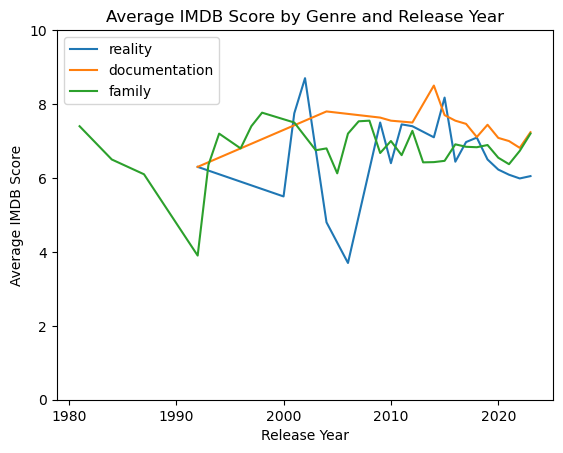

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data from the CSV file
df = pd.read_csv('titles.csv')

# remove all rows with missing values
df_cleaned = df.dropna()

# filter the DataFrame to only include movies with the genres 'comedy' and 'reality'
reality_movies = df_cleaned[df_cleaned['genres'].str.contains('reality')]
documentation_movies = df_cleaned[df_cleaned['genres'].str.contains('documentation')]
family_movies = df_cleaned[df_cleaned['genres'].str.contains('family')]

# group the movies by release year and calculate the mean score for each year and genre
reality_scores_by_year = reality_movies.groupby('release_year')['imdb_score'].mean()
documentation_scores_by_year = documentation_movies.groupby('release_year')['imdb_score'].mean()
family_scores_by_year = family_movies.groupby('release_year')['imdb_score'].mean()

# sort the data by release year
reality_scores_by_year = reality_scores_by_year.sort_index()
documentation_scores_by_year = documentation_scores_by_year.sort_index()
family_scores_by_year = family_scores_by_year.sort_index()

# plot the data for comedy movies as a line graph
plt.plot(reality_scores_by_year.index, reality_scores_by_year.values, label='reality')


plt.plot(documentation_scores_by_year.index, documentation_scores_by_year.values, label='documentation')

plt.plot(family_scores_by_year.index, family_scores_by_year.values, label='family')

# set the x-axis label, y-axis label, title, and legend
plt.xlabel('Release Year')
plt.ylabel('Average IMDB Score')
plt.title('Average IMDB Score by Genre and Release Year')
plt.legend()

# set the y-axis limits to 0-10
plt.ylim(0, 10)

# display the plot
plt.show()


Now let's combine it together

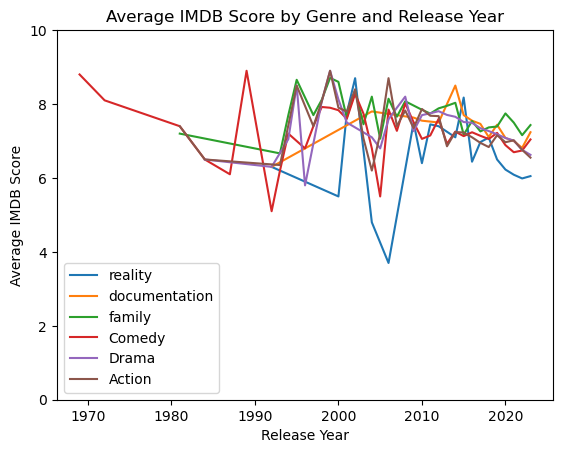

In [24]:
# plot the data for comedy movies as a line graph
plt.plot(reality_scores_by_year.index, reality_scores_by_year.values, label='reality')


plt.plot(documentation_scores_by_year.index, documentation_scores_by_year.values, label='documentation')

plt.plot(scifi_scores_by_year.index, scifi_scores_by_year.values, label='family')


plt.plot(comedy_scores_by_year.index, comedy_scores_by_year.values, label='Comedy')

plt.plot(drama_scores_by_year.index, drama_scores_by_year.values, label='Drama')

plt.plot(action_scores_by_year.index, action_scores_by_year.values, label='Action')

# set the x-axis label, y-axis label, title, and legend
plt.xlabel('Release Year')
plt.ylabel('Average IMDB Score')
plt.title('Average IMDB Score by Genre and Release Year')
plt.legend()

# set the y-axis limits to 0-10
plt.ylim(0, 10)

# display the plot
plt.show()


Using a naked eye surprisingly comedy and reality are the ones that seem to do the worst. 

Just like what we did with IMDB let's compare the highest of the highs with the highest of the lows

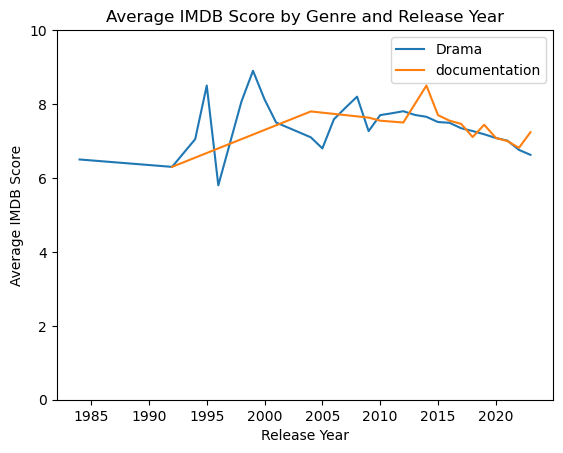

In [26]:
plt.plot(drama_scores_by_year.index, drama_scores_by_year.values, label='Drama')
plt.plot(documentation_scores_by_year.index, documentation_scores_by_year.values, label='documentation')

#set the x-axis label, y-axis label, title, and legend
plt.xlabel('Release Year')
plt.ylabel('Average IMDB Score')
plt.title('Average IMDB Score by Genre and Release Year')
plt.legend()

# set the y-axis limits to 0-10
plt.ylim(0, 10)

# display the plot
plt.show()


It looks like they seem to be fairly even. Surprising really.

# Conclusion

It seems that both drama and documentation are doing well. Besides reality shows, every genre seems to have a fairly high rating

Takeaway:
Film/Studio producers should almost never make reality shows if they are looking for a high rating on either IMDB or TMDB. Unlike TMDB however, IMDB generally treats documentaries more positively. 

# Final Thoughts

Although it seems clear that some films will tend to do worse on IMDB or TMDB, there are still many factors to consider such as: Actors, time/money spent, places where it was released, etc. In addition, ratings might not be important for some industries and thus may not care about how popular they are or how high of a score they have.

However, the study does suggest that people enjoy drama shows more than any other genre. Both IMDB and TMDB highlighted the fact that drama is one of the most popular and highest rated genre. If a studio wanted to make a film, it would be reccomended to at least have drama elements to it to qualify a drama tag to be attatched to it.